In [59]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.sparse import load_npz
import joblib

In [45]:
# Load processed dataset
file_path = "Processed_SentimentData.csv"
df = pd.read_csv(file_path)

# Load pre-saved TF-IDF vectorizer and label encoder
with open("tfidf_vectorizer.pkl", "rb") as tfidf_file:
    tfidf_vectorizer = pickle.load(tfidf_file)

with open("label_encoder.pkl", "rb") as label_file:
    label_encoder = pickle.load(label_file)

# Load pre-trained Logistic Regression model and TF-IDF vectorizer
logreg = joblib.load("logistic_regression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [27]:
# Train-Test Split
X_train = df.loc[:int(0.8*len(df)), 'cleaned_statement']
X_test = df.loc[int(0.8*len(df)):, 'cleaned_statement']
y_train = df.loc[:int(0.8*len(df)), 'encoded_status']
y_test = df.loc[int(0.8*len(df)):, 'encoded_status']

In [29]:
# Transform text data using TF-IDF vectorizer
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [31]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Predictions
y_pred = log_reg.predict(X_test_tfidf)

In [35]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Save trained model
with open("logistic_regression_model.pkl", "wb") as model_file:
    pickle.dump(log_reg, model_file)

print("Logistic Regression model saved successfully.")

Logistic Regression Accuracy: 0.4263
Confusion Matrix:
[[ 401    0  451  122    0  158   12]
 [ 185    0 1773  451    0  276   92]
 [  10    0  922   91    0   58  121]
 [   3    0  152 3033    0    2   48]
 [  23    0  665  219    0  132   38]
 [ 172    0  463  302    0  136   26]
 [   0    0    0    0    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.35      0.41      1144
           1       0.00      0.00      0.00      2777
           2       0.21      0.77      0.33      1202
           3       0.72      0.94      0.81      3238
           4       0.00      0.00      0.00      1077
           5       0.18      0.12      0.15      1099
           6       0.00      0.00      0.00         0

    accuracy                           0.43     10537
   macro avg       0.23      0.31      0.24     10537
weighted avg       0.32      0.43      0.35     10537

Logistic Regression model saved successfully.


C:\Users\abcd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abcd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abcd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abcd\anaconda3\Lib\site-packages\sklearn\m

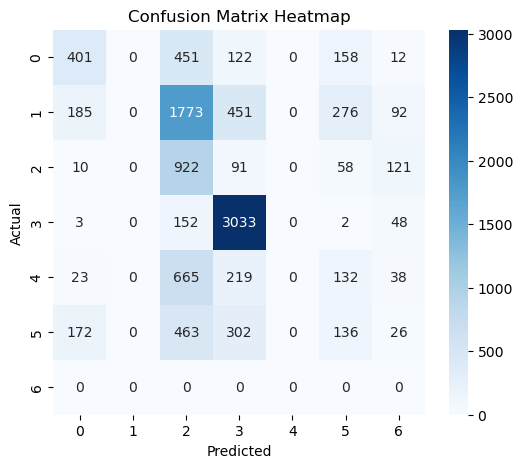

In [37]:
# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

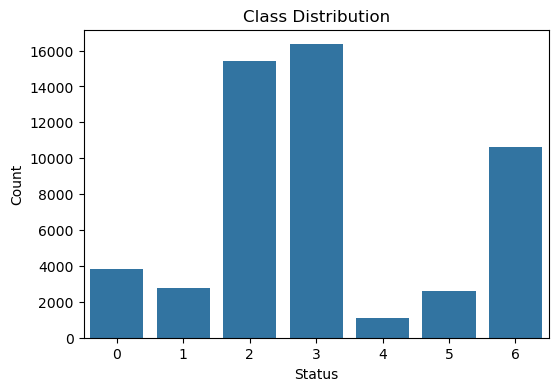

In [41]:
# 2. Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['encoded_status'])
plt.title("Class Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

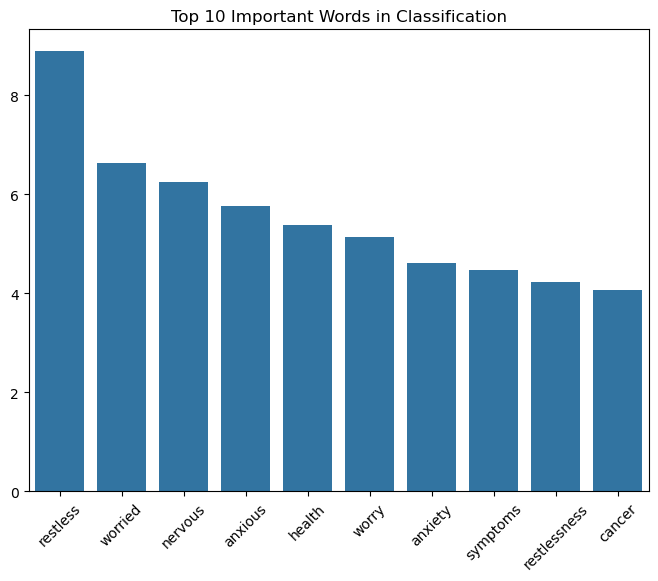

In [47]:
# 3. Feature Importance (Top 10 Words)
feature_names = vectorizer.get_feature_names_out()
coefficients = logreg.coef_[0]
top_features = sorted(zip(coefficients, feature_names), reverse=True)[:10]
plt.figure(figsize=(8,6))
sns.barplot(x=[x[1] for x in top_features], y=[x[0] for x in top_features])
plt.xticks(rotation=45)
plt.title("Top 10 Important Words in Classification")
plt.show()

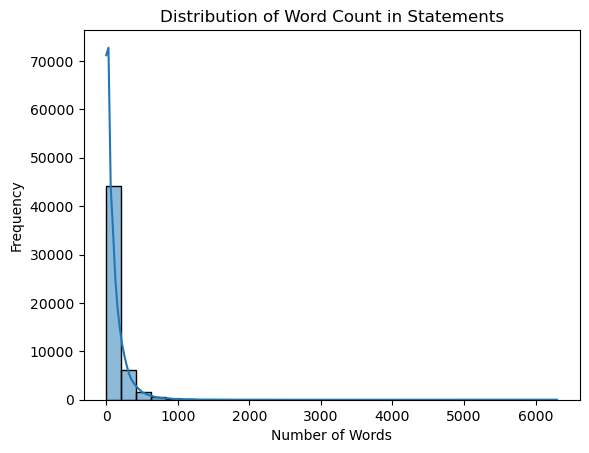

In [49]:
# 4. Word Count Distribution
df['word_count'] = df['cleaned_statement'].apply(lambda x: len(str(x).split()))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Distribution of Word Count in Statements")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

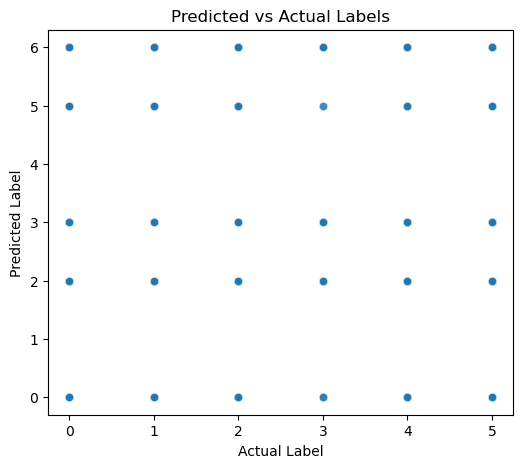

In [51]:
# 5. Predicted vs Actual Labels
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Predicted vs Actual Labels")
plt.show()

In [55]:
# 6. Function to Predict Sentiment with Confidence Score
def predict_sentiment_with_prob(text):
    text_tfidf = vectorizer.transform([text])  # Convert text to TF-IDF
    probabilities = logreg.predict_proba(text_tfidf)  # Get probabilities
    predicted_class = logreg.predict(text_tfidf)[0]  # Get predicted class
    confidence = max(probabilities[0])  # Get confidence score of prediction
    
    return predicted_class, confidence

# Example Predictions with Confidence Scores
sample_texts = [
    "I feel so lost and hopeless.",
    "I'm extremely happy with my progress!",
    "Things are getting worse every day...",
    "Feeling okay, but still uncertain about the future."
]

for text in sample_texts:
    predicted_class, confidence = predict_sentiment_with_prob(text)
    print(f"Text: {text}\nPredicted Sentiment: {predicted_class}\nConfidence: {confidence:.2f}\n")

Text: I feel so lost and hopeless.
Predicted Sentiment: 2
Confidence: 0.54

Text: I'm extremely happy with my progress!
Predicted Sentiment: 3
Confidence: 0.84

Text: Things are getting worse every day...
Predicted Sentiment: 3
Confidence: 0.46

Text: Feeling okay, but still uncertain about the future.
Predicted Sentiment: 3
Confidence: 0.83



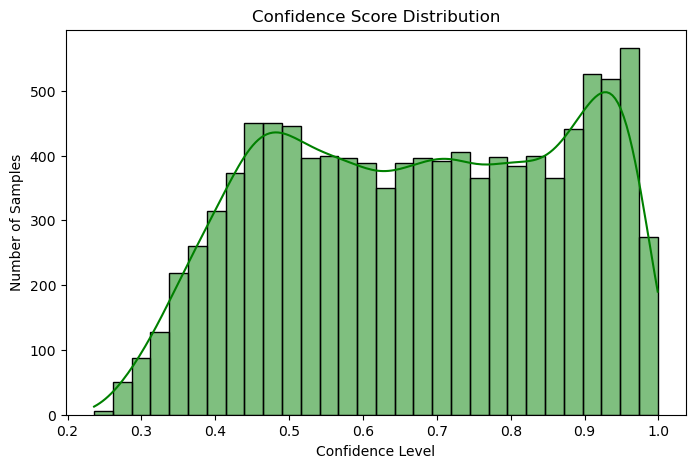

In [61]:
# Get confidence scores for all test samples
probabilities = logreg.predict_proba(X_test_tfidf)
confidence_scores = np.max(probabilities, axis=1)  # Get highest probability per prediction

plt.figure(figsize=(8,5))
sns.histplot(confidence_scores, bins=30, kde=True, color="green")
plt.title("Confidence Score Distribution")
plt.xlabel("Confidence Level")
plt.ylabel("Number of Samples")
plt.show()

In [63]:
threshold = 0.7  # Set confidence threshold
confident_predictions = confidence_scores > threshold

# Accuracy before and after filtering
original_accuracy = accuracy_score(y_test, y_pred)
filtered_accuracy = accuracy_score(y_test[confident_predictions], y_pred[confident_predictions])

print(f"Original Accuracy: {original_accuracy:.4f}")
print(f"Accuracy After Filtering Uncertain Cases: {filtered_accuracy:.4f}")
print(f"Number of Predictions Kept: {confident_predictions.sum()} out of {len(y_test)}")

Original Accuracy: 0.4263
Accuracy After Filtering Uncertain Cases: 0.6539
Number of Predictions Kept: 4958 out of 10537
